In [9]:
from IPython.display import display, Image
from prov.model import ProvDocument
from prov.dot import prov_to_dot
from shortid import ShortId

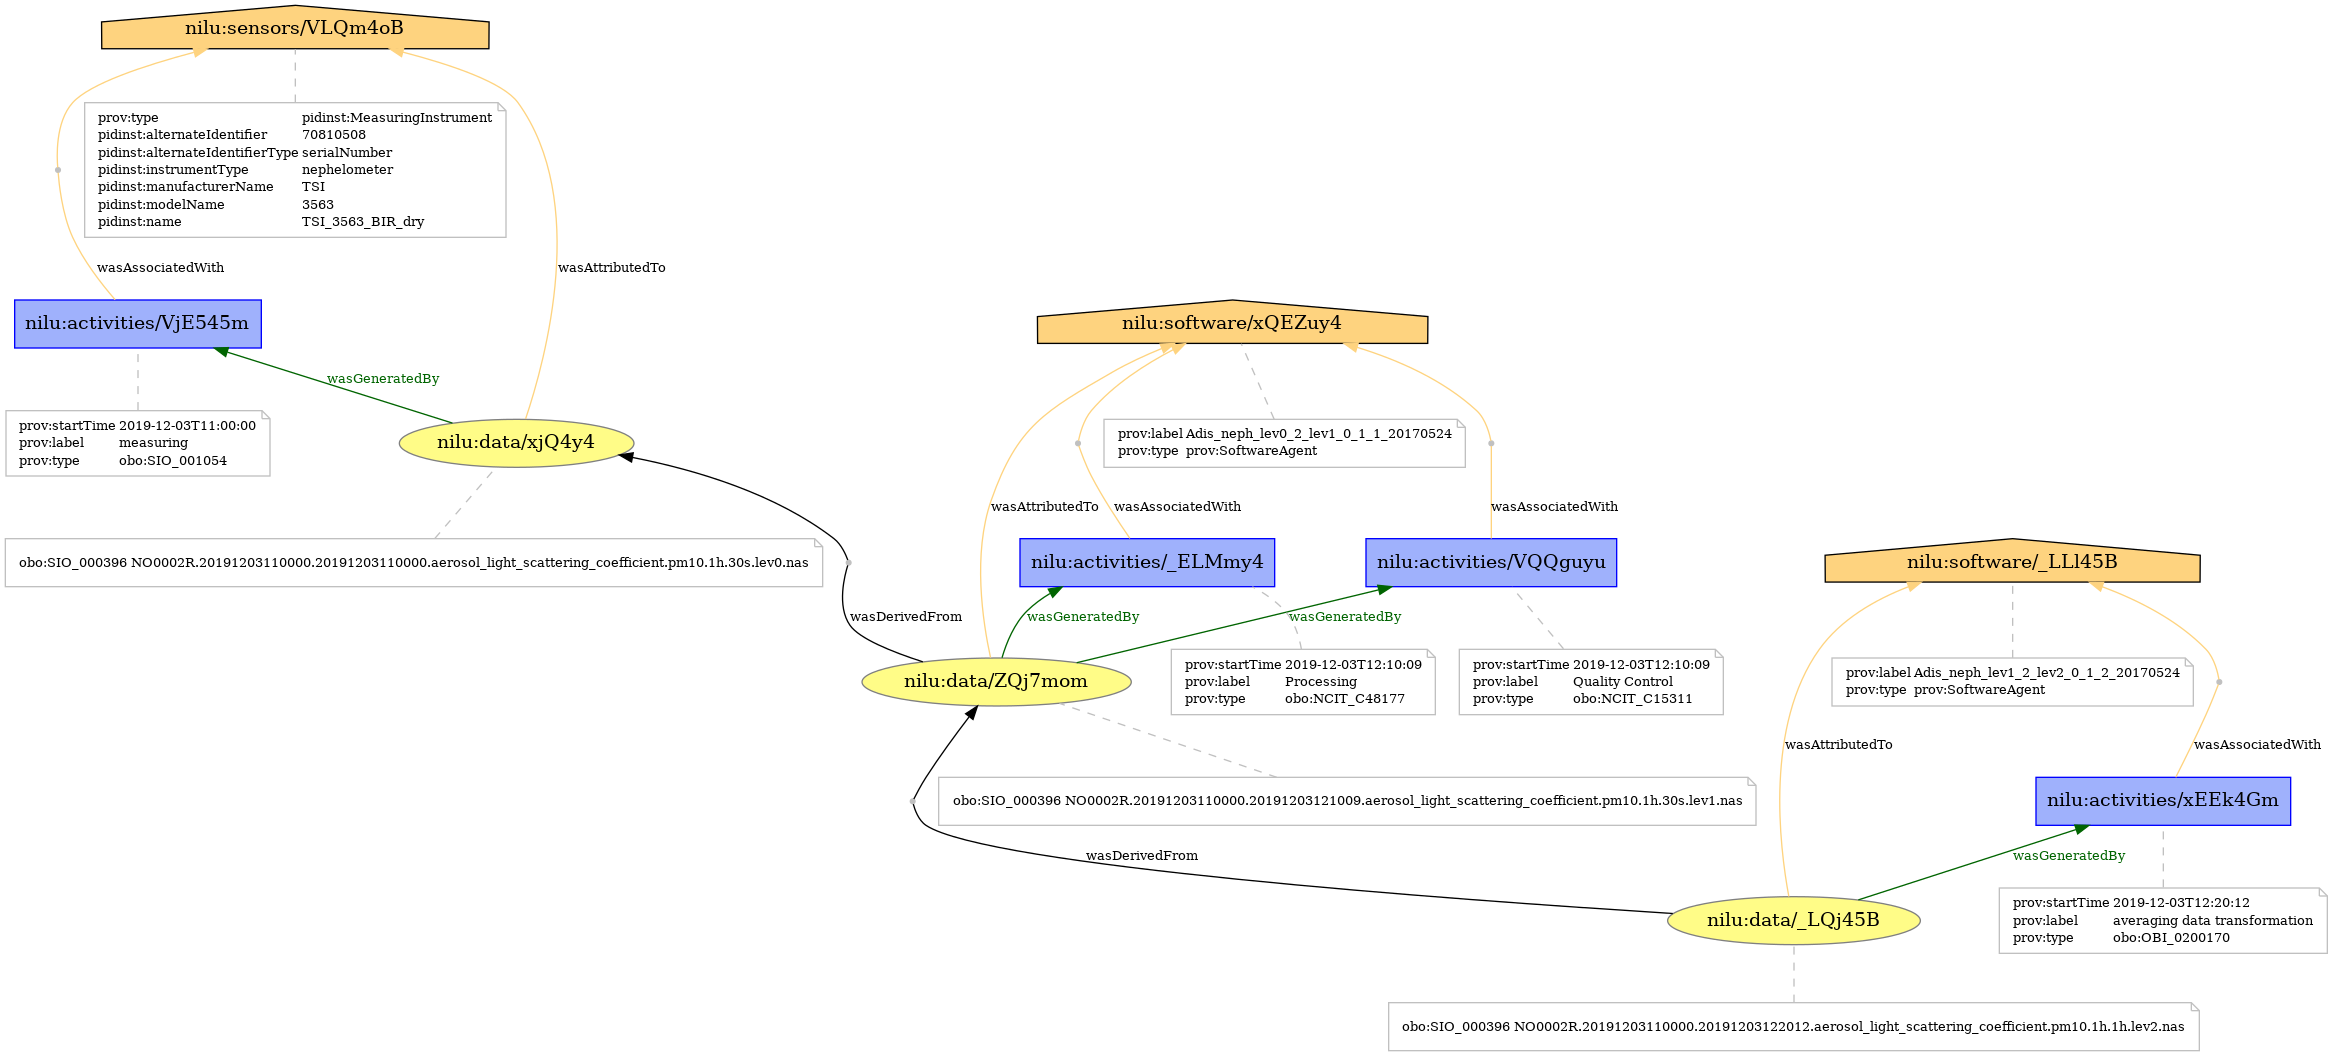

In [7]:
vocab = {
    'obo:SIO_001054': 'measuring',
    'obo:SIO_000396': 'file',
    'obo:NCIT_C15311': 'Quality Control',
    'obo:NCIT_C48177': 'Processing',
    'obo:OBI_0200170': 'averaging data transformation'
}

sid = ShortId()
prov = ProvDocument()

prov.add_namespace('obo', 'http://purl.obolibrary.org/obo/')
prov.add_namespace('nilu', 'http://nilu.no/')
prov.add_namespace('pidinst', 'http://pidinst.org/')
prov.add_namespace('rdfs', 'http://www.w3.org/2000/01/rdf-schema#')

et1 = prov.entity('nilu:data/{}'.format(sid.generate()), other_attributes={'obo:SIO_000396': 'NO0002R.20191203110000.20191203110000.aerosol_light_scattering_coefficient.pm10.1h.30s.lev0.nas'})
et2 = prov.entity('nilu:data/{}'.format(sid.generate()), other_attributes={'obo:SIO_000396': 'NO0002R.20191203110000.20191203121009.aerosol_light_scattering_coefficient.pm10.1h.30s.lev1.nas'})
et3 = prov.entity('nilu:data/{}'.format(sid.generate()), other_attributes={'obo:SIO_000396': 'NO0002R.20191203110000.20191203122012.aerosol_light_scattering_coefficient.pm10.1h.1h.lev2.nas'})

ag1 = prov.agent('nilu:sensors/{}'.format(sid.generate()), other_attributes={'prov:type': 'pidinst:MeasuringInstrument',
                                                                             'pidinst:instrumentType': 'nephelometer',
                                                                             'pidinst:manufacturerName': 'TSI',
                                                                             'pidinst:modelName': '3563',
                                                                             'pidinst:name': 'TSI_3563_BIR_dry',
                                                                             'pidinst:alternateIdentifier': '70810508',
                                                                             'pidinst:alternateIdentifierType': 'serialNumber'})
ag2 = prov.agent('nilu:software/{}'.format(sid.generate()), other_attributes={'prov:label': 'Adis_neph_lev0_2_lev1_0_1_1_20170524',
                                                                              'prov:type': 'prov:SoftwareAgent'})
ag3 = prov.agent('nilu:software/{}'.format(sid.generate()), other_attributes={'prov:label': 'Adis_neph_lev1_2_lev2_0_1_2_20170524',
                                                                              'prov:type': 'prov:SoftwareAgent'})

ac1 = prov.activity('nilu:activities/{}'.format(sid.generate()), '2019-12-03T11:00:00', other_attributes={'prov:label': vocab['obo:SIO_001054'], 
                                                                                                          'prov:type': 'obo:SIO_001054'})
ac2 = prov.activity('nilu:activities/{}'.format(sid.generate()), '2019-12-03T12:10:09', other_attributes={'prov:label': vocab['obo:NCIT_C15311'], 
                                                                                                          'prov:type': 'obo:NCIT_C15311'})
ac3 = prov.activity('nilu:activities/{}'.format(sid.generate()), '2019-12-03T12:10:09', other_attributes={'prov:label': vocab['obo:NCIT_C48177'], 
                                                                                                          'prov:type': 'obo:NCIT_C48177'})
ac4 = prov.activity('nilu:activities/{}'.format(sid.generate()), '2019-12-03T12:20:12', other_attributes={'prov:label': vocab['obo:OBI_0200170'], 
                                                                                                          'prov:type': 'obo:OBI_0200170'})

prov.wasGeneratedBy(et1, ac1)
prov.wasAttributedTo(et1, ag1)
prov.wasAssociatedWith(ac1, ag1)

prov.wasDerivedFrom(et2, et1)
prov.wasGeneratedBy(et2, ac2)
prov.wasGeneratedBy(et2, ac3)
prov.wasAttributedTo(et2, ag2)
prov.wasAssociatedWith(ac2, ag2)
prov.wasAssociatedWith(ac3, ag2)

prov.wasDerivedFrom(et3, et2)
prov.wasAttributedTo(et3, ag3)
prov.wasGeneratedBy(et3, ac4)
prov.wasAssociatedWith(ac4, ag3)

prov.serialize('data-1.ttl', format='rdf', rdf_format='ttl')

dot = prov_to_dot(prov)
display(Image(dot.create_png()))

In [10]:
from rdflib import Graph, URIRef, Literal
from rdflib.namespace import XSD, RDF, RDFS
from shortid import ShortId

In [11]:
sid = ShortId()

g = Graph()
        
g.bind('nilu', 'http://nilu.no/')
g.bind('obo', 'http://purl.obolibrary.org/obo/')
g.bind('pidinst', 'http://pidinst.org/')
g.bind('prov', 'http://www.w3.org/ns/prov#')
g.bind('rdf', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#')
g.bind('rdfs', 'http://www.w3.org/2000/01/rdf-schema#')
g.bind('xml', 'http://www.w3.org/XML/1998/namespace')
g.bind('xsd', 'http://www.w3.org/2001/XMLSchema#')

prov = {}
prov['Entity'] = URIRef('http://www.w3.org/ns/prov#Entity')
prov['Agent'] = URIRef('http://www.w3.org/ns/prov#Agent')
prov['Activity'] = URIRef('http://www.w3.org/ns/prov#Activity')
prov['SoftwareAgent'] = URIRef('http://www.w3.org/ns/prov#SoftwareAgent')
prov['wasAttributedTo'] = URIRef('http://www.w3.org/ns/prov#wasAttributedTo')
prov['wasDerivedFrom'] = URIRef('http://www.w3.org/ns/prov#wasDerivedFrom')
prov['wasGeneratedBy'] = URIRef('http://www.w3.org/ns/prov#wasGeneratedBy')
prov['wasAssociatedWith'] = URIRef('http://www.w3.org/ns/prov#wasAssociatedWith')
prov['startedAtTime'] = URIRef('http://www.w3.org/ns/prov#startedAtTime')

obo = {}
obo['SIO_000396'] = URIRef('http://purl.obolibrary.org/obo/SIO_000396')
obo['SIO_001054'] = URIRef('http://purl.obolibrary.org/obo/SIO_001054')
obo['NCIT_C15311'] = URIRef('http://purl.obolibrary.org/obo/NCIT_C15311')
obo['NCIT_C48177'] = URIRef('http://purl.obolibrary.org/obo/NCIT_C48177')
obo['OBI_0200170'] = URIRef('http://purl.obolibrary.org/obo/OBI_0200170')

pidinst = {}
pidinst['MeasuringInstrument'] = URIRef('http://pidinst.org/MeasuringInstrument')
pidinst['alternateIdentifier'] = URIRef('http://pidinst.org/alternateIdentifier')
pidinst['alternateIdentifierType'] = URIRef('http://pidinst.org/alternateIdentifierType')
pidinst['instrumentType'] = URIRef('http://pidinst.org/instrumentType')
pidinst['name'] = URIRef('http://pidinst.org/name')
pidinst['manufacturerName'] = URIRef('http://pidinst.org/manufacturerName')
pidinst['modelName'] = URIRef('http://pidinst.org/modelName')

et1 = URIRef('http://nilu.no/data/{}'.format(sid.generate()))
et2 = URIRef('http://nilu.no/data/{}'.format(sid.generate()))
et3 = URIRef('http://nilu.no/data/{}'.format(sid.generate()))
ag1 = URIRef('http://nilu.no/sensors/{}'.format(sid.generate()))
ag2 = URIRef('http://nilu.no/software/{}'.format(sid.generate()))
ag3 = URIRef('http://nilu.no/software/{}'.format(sid.generate()))
ac1 = URIRef('http://nilu.no/activities/{}'.format(sid.generate()))
ac2 = URIRef('http://nilu.no/activities/{}'.format(sid.generate()))
ac3 = URIRef('http://nilu.no/activities/{}'.format(sid.generate()))
ac4 = URIRef('http://nilu.no/activities/{}'.format(sid.generate()))

g.add((et1, RDF.type, prov['Entity']))
g.add((et1, obo['SIO_000396'], Literal('NO0002R.20191203110000.20191203110000.aerosol_light_scattering_coefficient.pm10.1h.30s.lev0.nas', datatype=XSD.string)))
g.add((et1, prov['wasAttributedTo'], ag1))
g.add((et1, prov['wasGeneratedBy'], ac1))

g.add((et2, RDF.type, prov['Entity']))
g.add((et2, obo['SIO_000396'], Literal('NO0002R.20191203110000.20191203121009.aerosol_light_scattering_coefficient.pm10.1h.30s.lev1.nas', datatype=XSD.string)))
g.add((et2, prov['wasAttributedTo'], ag2))
g.add((et2, prov['wasDerivedFrom'], et1))
g.add((et2, prov['wasGeneratedBy'], ac2))
g.add((et2, prov['wasGeneratedBy'], ac3))

g.add((et3, RDF.type, prov['Entity']))
g.add((et3, obo['SIO_000396'], Literal('NO0002R.20191203110000.20191203122012.aerosol_light_scattering_coefficient.pm10.1h.1h.lev2.nas', datatype=XSD.string)))
g.add((et3, prov['wasAttributedTo'], ag3))
g.add((et3, prov['wasDerivedFrom'], et2))
g.add((et3, prov['wasGeneratedBy'], ac4))

g.add((ag1, RDF.type, prov['Agent']))
g.add((ag1, RDF.type, pidinst['MeasuringInstrument']))
g.add((ag1, pidinst['alternateIdentifier'], Literal('70810508', datatype=XSD.string)))
g.add((ag1, pidinst['alternateIdentifierType'], Literal('serialNumber', datatype=XSD.string)))
g.add((ag1, pidinst['instrumentType'], Literal('nephelometer', datatype=XSD.string)))
g.add((ag1, pidinst['name'], Literal('TSI_3563_BIR_dry', datatype=XSD.string)))
g.add((ag1, pidinst['manufacturerName'], Literal('TSI', datatype=XSD.string)))
g.add((ag1, pidinst['modelName'], Literal('3563', datatype=XSD.string)))

g.add((ag2, RDF.type, prov['Agent']))
g.add((ag2, RDF.type, prov['SoftwareAgent']))
g.add((ag2, RDFS.label, Literal('Adis_neph_lev0_2_lev1_0_1_1_20170524', datatype=XSD.string)))

g.add((ag3, RDF.type, prov['Agent']))
g.add((ag3, RDF.type, prov['SoftwareAgent']))
g.add((ag3, RDFS.label, Literal('Adis_neph_lev1_2_lev2_0_1_2_20170524', datatype=XSD.string)))

g.add((ac1, RDF.type, prov['Activity']))
g.add((ac1, RDF.type, obo['SIO_001054']))
g.add((ac1, RDFS.label, Literal('measuring', datatype=XSD.string)))
g.add((ac1, prov['startedAtTime'], Literal('2019-12-03T11:00:00', datatype=XSD.dateTime)))
g.add((ac1, prov['wasAssociatedWith'], ag1))

g.add((ac2, RDF.type, prov['Activity']))
g.add((ac2, RDF.type, obo['NCIT_C15311']))
g.add((ac2, RDFS.label, Literal('Quality Control', datatype=XSD.string)))
g.add((ac2, prov['startedAtTime'], Literal('2019-12-03T12:10:09', datatype=XSD.dateTime)))
g.add((ac2, prov['wasAssociatedWith'], ag2))

g.add((ac3, RDF.type, prov['Activity']))
g.add((ac3, RDF.type, obo['NCIT_C48177']))
g.add((ac3, RDFS.label, Literal('Processing', datatype=XSD.string)))
g.add((ac3, prov['startedAtTime'], Literal('2019-12-03T12:10:09', datatype=XSD.dateTime)))
g.add((ac3, prov['wasAssociatedWith'], ag2))

g.add((ac4, RDF.type, prov['Activity']))
g.add((ac4, RDF.type, obo['OBI_0200170']))
g.add((ac4, RDFS.label, Literal('averaging data transformation', datatype=XSD.string)))
g.add((ac4, prov['startedAtTime'], Literal('2019-12-03T12:20:12', datatype=XSD.dateTime)))
g.add((ac4, prov['wasAssociatedWith'], ag3))

        
g.serialize(destination='data-2.ttl', format='ttl')

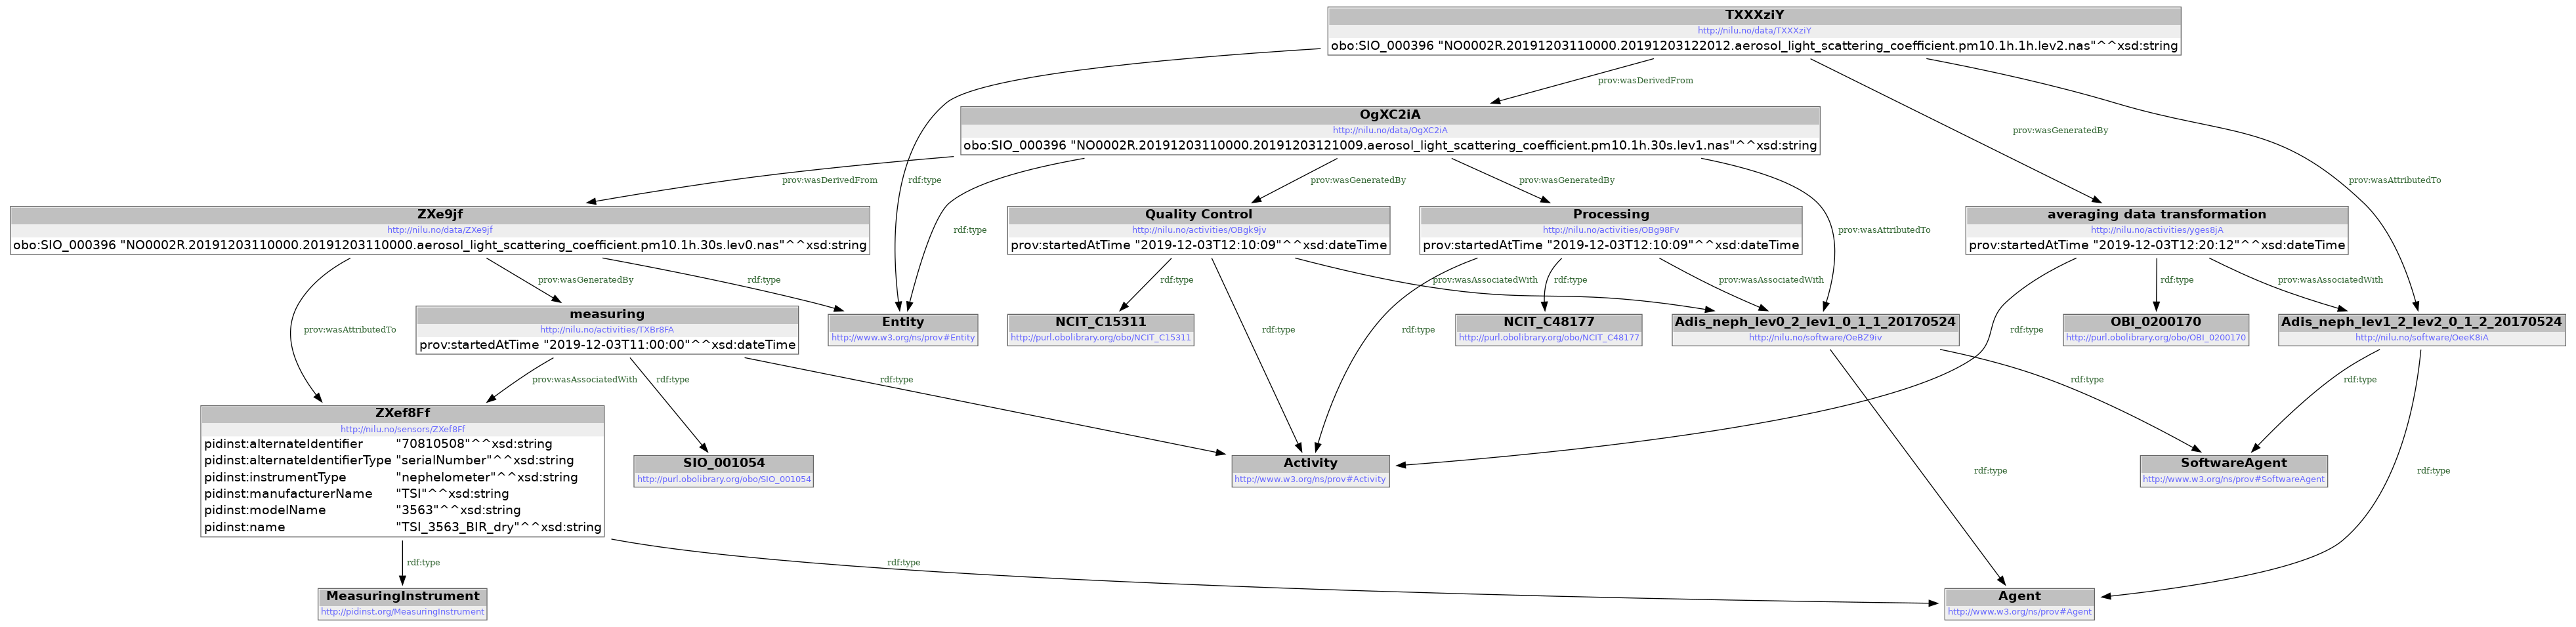

In [12]:
import io
import pydot
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

stream = io.StringIO()
rdf2dot(g, stream)
(dg,) = pydot.graph_from_dot_data(stream.getvalue())
display(Image(dg.create_png()))